## Observations and Insights 

In [ ]:
#1. There is a positive correlation between Mouse Weight vs Average Tumor Volume for Capomulin.
#2. Capomuline and Ramicane have a higher success rate in drug trials as seen in the data and graphs. 
#3. The number of male mice is slightly higher than female mice. The drug trials were higher in male.
#4. Capomulin seemed to be the most successful drug. 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')

# Display the data table for preview

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
len(combined_data['Mouse ID'].value_counts())

249

In [9]:
# Getting the duplicate mice by ID 

duplicated_data = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
num_duplicated_id = pd.DataFrame(duplicated_data)
num_duplicated_id

,0
0,g989


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicated_data)==False]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice in the clean DataFrame.
new_data = len(clean_data['Mouse ID'].value_counts())
new_data

248

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimen_df = clean_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_df = drug_regimen_df.mean()['Tumor Volume (mm3)']
median_df = drug_regimen_df.median()['Tumor Volume (mm3)']
var_df = drug_regimen_df.var()['Tumor Volume (mm3)']
std_df = drug_regimen_df.std()['Tumor Volume (mm3)']
sem_df = drug_regimen_df.sem()['Tumor Volume (mm3)']

#std_df.head()
#var_df.head()


# merge dataframes
merge_one_df = pd.merge(mean_df, median_df, how="outer",on=["Drug Regimen"])
merge_two = pd.merge(merge_one_df, var_df, how="outer", on=["Drug Regimen"])
merge_one = pd.merge(std_df, sem_df, how="left", on=["Drug Regimen"])


# Assemble the resulting series into a single summary dataframe.
drug_merge = pd.merge(merge_two, merge_one, how="left", on=["Drug Regimen"])

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_merge = drug_merge.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)",                                         "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)" , 
                                       "Tumor Volume (mm3)":  "Variance Tumor Volume (mm3)",
                                        "Tumor Volume (mm3)_x_y": "Std. Dev Tumor Volume (mm3)",
                                       "Tumor Volume (mm3)_y_y:":"SEM Tumor Volume (mm3)"})
drug_merge.head()

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev Tumor Volume (mm3),Tumor Volume (mm3)_y_y
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


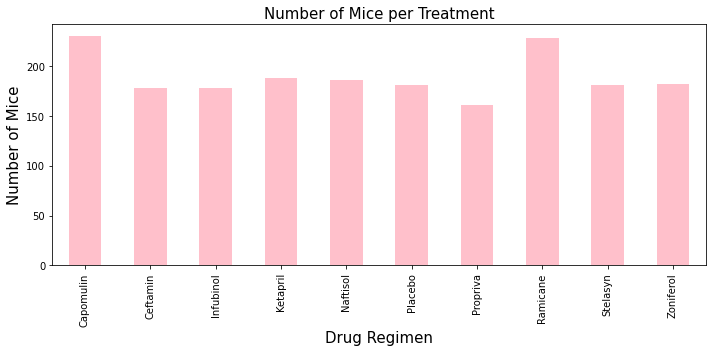

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_count_df = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
mice_count_df

plot_pandas = mice_count_df.plot.bar(figsize=(10,5), color='pink',fontsize = 10)
mice_count_df

plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice",fontsize = 15)
plt.title("Number of Mice per Treatment",fontsize = 15)


plt.tight_layout()
plt.show()

mice_count_df

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_reg = clean_df['Drug Regimen'].value_counts()

y_axis = drug_reg.values
x_axis = np.arange(0,len(y_axis),1)
x_drugs = drug_reg.index
                 

plt.bar(x_drugs, y_axis, color='b',alpha=0.5, align='center')
plt.ylabel("Trial Count",fontsize = 15)
plt.xlabel("Type of Drugs",fontsize = 15)
plt.title("Total Drug Count",fontsize = 15)
plt.xticks(rotation=90)

plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_gender = clean_data.groupby(['Mouse ID','Sex'])

# Returning the number of elements in groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

#Creating a new dataframe with the count of male and female
mouse_gender = pd.DataFrame(gender_df.groupby(['Sex']).count())
#mouse_gender
column_name = mouse_gender.columns[0]
pie_title = 'Gender Distribution'
explode = (0.1, 0.1)
mouse_gender = mouse_gender.rename(columns={column_name: 'Gender Distribution'})
gender_plot = mouse_gender.plot.pie(y='Gender Distribution',explode = explode,autopct="%0.1f%%",title = pie_title, legend=False, colors = ["pink", "lightblue"],subplots=True,shadow=True, startangle=140)
gender_plot

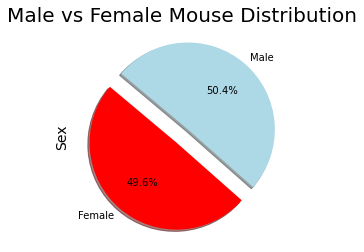

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.5967741935,50.4032258065]
colors = ['red', 'lightblue']
explode = (0.1, 0.1)

#Creating the pie chart using the from above.
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Distribution',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_tumor_vol = clean_data.groupby('Mouse ID').max().reset_index()

merge_tumor_vol = max_tumor_vol[['Mouse ID','Timepoint']].merge(clean_data, on=['Mouse ID','Timepoint'],how='left')

merge_tumor_vol.round(2)

capomulin= merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merge_tumor_vol.loc[merge_tumor_vol['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']

# Calculating the any potential quartiles and outliers of the most promising treatment regimens
                     
#Capmulin

quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr= upper_cap-lower_cap

#Outliers

upper_ocap= upper_cap+(1.5*iqr)
lower_ocap= lower_cap-(1.5*iqr)


# Ramicane Quartile and outlier
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr= upper_ram-lower_ram

# Outliers
upper_oram= upper_ram+(1.5*iqr)
lower_oram= lower_ram-(1.5*iqr)



 #Infubionol quartiles and Outliers
quartile_in=infubinol.quantile([.25,.5,.75])
lower_in = quartile_in[.25]
upper_in = quartile_in[.75]
iqr= upper_in-lower_in
#Infubionol Outliers
lower_oin= lower_in-(1.5*iqr)
upper_oin= upper_in+(1.5*iqr)


#Ceftmain quartiles amd Outliers
quartile_cef = ceftamin.quantile([.25,.5,.75])
lower_ceft = quartile_cef[.25]
upper_ceft = quartile_cef[.75]
iqr = upper_ceft-lower_ceft

#Outliers

upper_cef= upper_ceft+(1.5*iqr)
lower_cef= lower_ceft-(1.5*iqr)
                     
# Output for the quartiles and outliers of the most promising treatment regimens

print(f'The upper quartile of Capomulin is {round((upper_cap),2)}')   
print(f'The lower quartile of Capomulin is {round((lower_cap),2)}')
print(f'The interquartile of Capomulin is {round((iqr),2)}')
print(f'The values above {round((upper_ocap),2)} is the outlier')
print(f'The values below {round((lower_ocap),2)} is the outlier')  

print(f'/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*\n')

print(f'The upper quartile of Ramicane is {round((upper_ram),2)}')   
print(f'The lower quartile of Ramicane is {round((lower_ram),2)}')
print(f'The interquartile of Ramicane is {round((iqr),2)}')
print(f'The values above {round((upper_oram),2)} is the outlier')
print(f'The values below {round((lower_oram),2)} is the outlier\n') 

print(f'/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*\n')

print(f'The upper quartile of Infubionol is {round((upper_in),2)}')   
print(f'The lower quartile of Infubionol is {round((lower_in),2)}')
print(f'The interquartile of Infubionol is {round((iqr),2)}')
print(f'The values above {round((upper_oin),2)} is the outlier')
print(f'The values below {round((lower_oin),2)} is the outlier') 

print(f'/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*\n')

print(f'The upper quartile of Ceftmain is {round((upper_ceft),2)}')   
print(f'The lower quartile of Ceftmain is {round((lower_ceft),2)}')
print(f'The interquartile of Ceftmain is {round((iqr),2)}')
print(f'The values above {round((upper_cef),2)} is the outlier')
print(f'The values below {round((lower_cef),2)} is the outlier\n')


The upper quartile of Capomulin is 40.16
The lower quartile of Capomulin is 32.38
The interquartile of Capomulin is 15.58
The values above 51.83 is the outlier
The values below 20.7 is the outlier
/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*

The upper quartile of Ramicane is 40.66
The lower quartile of Ramicane is 31.56
The interquartile of Ramicane is 15.58
The values above 54.31 is the outlier
The values below 17.91 is the outlier

/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*

The upper quartile of Infubionol is 65.53
The lower quartile of Infubionol is 54.05
The interquartile of Infubionol is 15.58
The values above 82.74 is the outlier
The values below 36.83 is the outlier
/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*/*

The upper quartile of Ceftmain is 64.3
The lower quartile of Ceftmain is 48.72
The interquartile of Ceftmain is 15.58
The values above 87.67 is the outlier
The values below 25.36 is the outlier



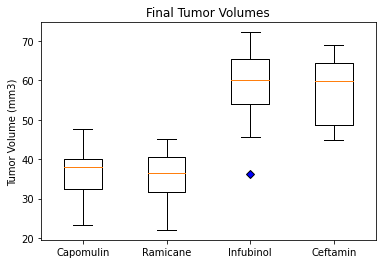

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

blue_diamond = dict(markerfacecolor='b', marker='D')

#Make Box Plot
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=blue_diamond)

#Formatting
plt.title("Final Tumor Volumes")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

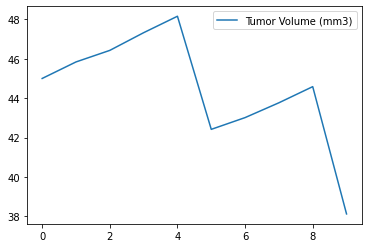

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_time_df = combined_data[combined_data['Mouse ID'].isin(['j119'])]
tumor_time_df

new_tumor_time_df = tumor_time_df[['Mouse ID','Tumor Volume (mm3)']]
line_plot_df = new_tumor_time_df.reset_index()
line_plot_final = line_plot_df[["Mouse ID",  "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


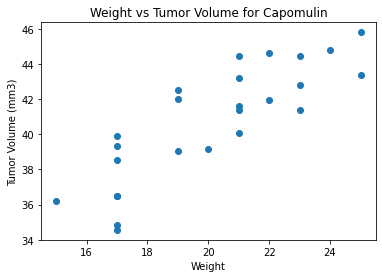

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_weight= clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

cap_average = cap_weight.groupby(["Mouse ID"]).mean()

plt.scatter(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()


## Correlation and Regression

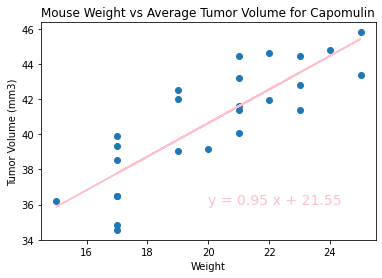

Correlation between these two variables is 0.84


In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"])
regress_values = cap_average["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(cap_average["Weight (g)"],cap_average["Tumor Volume (mm3)"] )
plt.plot(cap_average["Weight (g)"], regress_values, color='pink')
plt.annotate(line_eq,(20,36), color='pink', fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show()
print(f"Correlation between these two variables is {round(rvalue,2)}")
